# Математика для машинного обучения
## Домашнее задание №5

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнил(а): *Киекбаев Анвар Эхиярович*

## Статистика

### Описательные статистики

Для выборки $x_1, x_2, \ldots, x_n$ определены следующие величины (они часто называются *описательными статистиками*):

1. Выборочное среднее: $$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}.$$
2. Выборочная дисперсия: $$\sigma^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n}.$$
3. Исправленная выборочная дисперсия: $$\sigma_+^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n - 1}.$$
4. Выборочное стандартное отклонение: квадратный корень из выборочной дисперсии (обозначается $\sigma$ или $SD$).
5. Исправленное выборочное стандартное отклонение: квадратный корень из исправленной выборочной дисперсии (обозначается $\sigma_+$ или $SD_+$ или ещё как-нибудь).
6. [Медиана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0).

In [2]:
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import cm

### Задача 1
Для выборки $\{1, 10, 2, 15, 100\}$ найти все характеристики, перечисленные выше.

Подсказка: можно использовать функции `np.mean`, `np.var`, `np.std`, `np.median`. Для вычисления исправленной выборочной дисперсии и исправленного выборочного стандартного отклонения необходимо соответствующим функциям передать параметр `ddof=1`.

In [4]:
import numpy as np

population = [1,10,2,15,100]

mean = np.mean(population)
var = np.var(population)
var_crctd = np.var(population, ddof=1)
std = np.std(population)
std_crctd = np.std(population, ddof=1)
median = np.median(population)

print('''
Выборочное среднее: {}
Выборочная дисперсия: {}
Исправленная выборочная дисперсия: {}
Выборочное стандартное отклонение: {}
Исправленное выборочное стандартное отклонение: {}
Медиана: {}
'''.format(mean, var, var_crctd, std, std_crctd, median))


Выборочное среднее: 25.6
Выборочная дисперсия: 1410.64
Исправленная выборочная дисперсия: 1763.3000000000002
Выборочное стандартное отклонение: 37.55848772248425
Исправленное выборочное стандартное отклонение: 41.99166583978302
Медиана: 10.0



### Квартет Энскомба
Загрузим набор данных, который называется «квартетом Энскомба». (Нам потребуется использовать пакет `pandas`.)

In [5]:
import pandas as pd
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv"
data = pd.read_csv(url, index_col=0)
data

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


Для обращения к отдельным переменным (стобцам таблицы) нужно использовать такой синтаксис:

(Первая колонка — номер наблюдения; на неё сейчас можно не обращать внимания.)

### Задача 2
1. Для каждой из переменных, входящих в «квартет Энскомба», найти среднее и выборочную дисперсию.
2. Для каждой из четырёх пар соответствующих переменных (`x1` и `y1`, `x2` и `y2` и т.д.) найти корреляцию Пирсона. (Подсказка: можно использовать функцию `pearsonr` из `scipy.stats`: она возвращает пару, первый элемент которой — коэффициент корреляции, а второй — *p-value* для проверки нулевой гипотезы об отсутствии зависимости между величинами.)
3. Для каждой из указанных пар переменных построить scatter plot. (Подсказка: можно использовать `plt.plot` или `plt.scatter`.)

*Квартет Энскомба демонстрирует, что даже если числовые характеристики выборок совпадают, их реальное распределение и характер связей между переменными могут существенно различаться. Поэтому визуализация — важный элемент анализа данных.*

1:
   Выборочное среднее для x1:   9.0
   Выборочная дисперсия для x1: 10.0
   Выборочное среднее для x2:   9.0
   Выборочная дисперсия для x2: 10.0
   Выборочное среднее для x3:   9.0
   Выборочная дисперсия для x3: 10.0
   Выборочное среднее для x4:   9.0
   Выборочная дисперсия для x4: 10.0
   Выборочное среднее для y1:   7.500909090909093
   Выборочная дисперсия для y1: 3.7520628099173554
   Выборочное среднее для y2:   7.50090909090909
   Выборочная дисперсия для y2: 3.752390082644628
   Выборочное среднее для y3:   7.5
   Выборочная дисперсия для y3: 3.747836363636364
   Выборочное среднее для y4:   7.500909090909091
   Выборочная дисперсия для y4: 3.7484082644628103
2:
   Корреляция Пирсона для (x1, y1): 0.81642051634484
   Корреляция Пирсона для (x2, y2): 0.8162365060002427
   Корреляция Пирсона для (x3, y3): 0.8162867394895981
   Корреляция Пирсона для (x4, y4): 0.816521436888503
3:


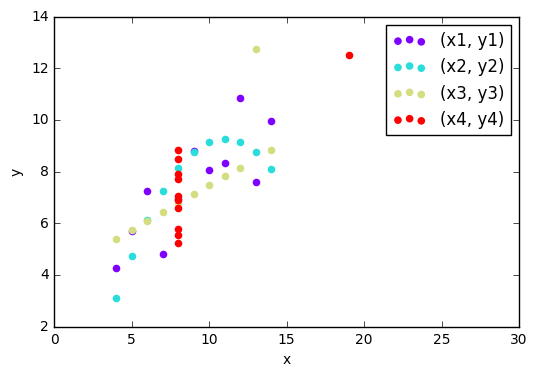

In [6]:
%matplotlib inline

print('1:')
for column in data:
    print('   Выборочное среднее для {}:   {}'.format(column, np.mean(data[column])))
    print('   Выборочная дисперсия для {}: {}'.format(column, np.var(data[column])))

print('2:')
for index in range(1, 5):
    print(
        '   Корреляция Пирсона для (x{}, y{}): {}'\
        .format(index, index, stats.pearsonr(data['x' + str(index)], data['y' + str(index)])[0]))

print('3:')
plt.xlim(0, 30)
plt.xlabel('x')
plt.ylabel('y')
colors = cm.rainbow(np.linspace(0, 1, 4))
for clr, i in zip(colors, range(1, 5)):
    plt.scatter(data['x' + str(i)], data['y' + str(i)], label='(x' + str(i) +', y' + str(i) + ')', color=clr)
plt.legend()

### Задача 3
Будем проводить следующий эксперимент: сгенерируем две различные независимые выборки размером `n = 5` из равномерного распределения на отрезке $[0, 1]$. С помощью теста Стьюдента проверим гипотезу о том, что эти две выборки были получены из распределений с различными средними ($H_0\colon m_1 = m_2$, $H_1\colon m_1 ≠ m_2$) на уровне значимости 5%.

Повторим этот эксперимент 10000 раз. Сколько раз мы будем совершать ошибку первого рода, то есть ошибочно отвергать нулевую гипотезу? Что будет, если изменить уровень значимости (например, использовать уровень значимости 1%)? Что будет, если увеличить размер выборки до `n = 20`?

Для генерирования выборок можно использовать `uniform.rvs`, для теста Стьюдента — `ttest_ind` (обе функции из пакета `scipy.stats`). Последняя функция возвращает пару, состоящую из значения t-статистики и p-value.

In [7]:
def count_error(pop_size, err_lvl):
    err_cnt = 0
    for i in range(10000):
        p1 = stats.uniform.rvs(size=pop_size)
        p2 = stats.uniform.rvs(size=pop_size)
        if abs(stats.ttest_ind(p1, p2)[1]) < err_lvl:
            err_cnt += 1
    return err_cnt
        
print('Выборка: 5, уровень значимости 5%: {}'.format(count_error(5, 0.05)))
print('Выборка: 5, уровень значимости 1%: {}'.format(count_error(5, 0.01)))
print('Выборка: 20, уровень значимости 5%: {}'.format(count_error(20, 0.05)))
print('Выборка: 20, уровень значимости 1%: {}'.format(count_error(20, 0.01)))

Выборка: 5, уровень значимости 5%: 556
Выборка: 5, уровень значимости 1%: 125
Выборка: 20, уровень значимости 5%: 512
Выборка: 20, уровень значимости 1%: 96


---

# Review

Немного не хватает вашего заключения на тему, что же изменится с изменением параметров эксперимента. Поскольку вы имеете дело со случайными величинами, просто один раз поставить эксперимент и привести его результаты в качестве ответа, увы, недостаточно.

По крайней мере, ожидалось, что вы заметите, что доля ошибок довольно близка к выбранному уровню значимости. Это особенно заметно при повторении эксперимента.

---

### Задача 4
Будем проводить следующий численный эксперимент. Сгенерируем две независимые выборки из стандартного нормального распределения одинаковой длины `n = 10`. Посчитаем коэффициент корреляции Пирсона между ними. Повторим процедуру 1000 раз. Выберем пару выборок с наибольшим по модулю коэффициентом корреляции.

Указать, какой коэффициент корреляции получится. Нарисовать scatter plot для этой пары выборок.

*Эта задача показывает, что если долго искать, то можно найти хорошо коррелирующие переменные, даже если они заведомо были порождены независимыми случайными величинами.*

Наибольший по модулю коэффициент корреляции: 0.5505357772931855


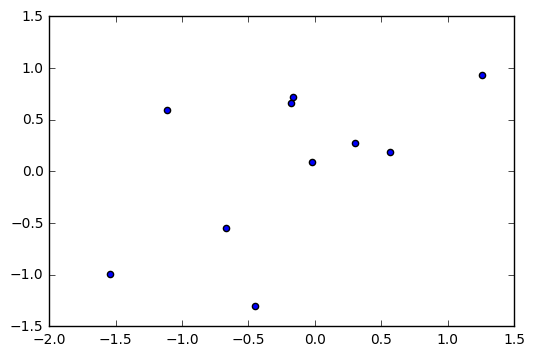

In [10]:
mx = 0
max_populations = []
for i in range(1000):
    p1 = np.random.normal(size=10)
    p2 = np.random.normal(size=10)
    corr = stats.pearsonr(p1, p2)[0]
    if mx < abs(corr):
        mx = corr
        max_populations = [p1, p2]
print('Наибольший по модулю коэффициент корреляции: {}'.format(mx))
plt.scatter(max_populations[0], max_populations[1])

---

# Review

corr = stats.pearsonr(p1, p2)[1]

Надо было брать по индексу 0, да и что-то из картинки совсем не похоже, что величины коррелируют, скорее строго наоборот.

---



### Задача 5
Рассмотрим две выборки: $x = \{1, 3, 1, 5, 2, 6\}$ и $y = \{5, 9, 10, 4, 12\}$. Пусть мы проверяем гипотезу о том, что они были получены из распределений с различными средними ($H_0: m_1 = m_2$, $H_1: m_1 \ne m_2$). Будем действовать двумя методами:

1. Используя тест Стьюдента: найти p-value и сделать вывод о наличии статистически значимой разницы средних. (При использовании функции `ttest_ind` укажите параметр `equal_var=False`, поскольку дисперсии выборок существенно различаются.)
2. Используя компьютерную симуляцию (permutation test).

Компьютерная симуляция будет устроена следующим образом:

1. Запомнить разность средних двух исходных выборок: $\bar x - \bar y$.
2. 10000 раз повторить следущие действия:
    1. Перемешать выборки: взять случайный элемент первой выборки, случайный элемент второй выборки и поменять их местами. И так 100 раз.
    2. Посчитать разность средних получившихся выборок.

Вычислить, с какой частотой модуль разности перемешанных выборок будет оказываться больше или равным модулю разности исходных выборок. Сравнить в p-value, полученным с помощью применения t-теста.

In [9]:
x = [1,3,1,5,2,6]
y = [5,9,10,4,12]

p_val_st = stats.ttest_ind(x, y, equal_var=False)[1]
diff_st = abs(np.mean(x) - np.mean(y))

diff_cnt = 0
for _ in range(10000):
    for _ in range(100):
        a = np.random.randint(0, len(x))
        b = np.random.randint(0, len(y))
        t = x[a]
        x[a] = y[b]
        y[b] = t
    if abs(np.mean(x) - np.mean(y)) >= diff_st:
        diff_cnt += 1
        
p_val_pt = diff_cnt / 10000

print('P-value теста Стьюдента: {}'.format(p_val_st))
print('Частота компьютерной симуляции: {}'.format(p_val_pt))
if p_val_st > p_val_pt:
    print('P-value теста Стьюдента больше чем частота компьютерной симуляции')
elif (p_val_st < p_val_pt):
    print('P-value теста Стьюдента меньше чем частота компьютерной симуляции')
else:
    print('Значения равны')

P-value теста Стьюдента: 0.02627307481327519
Частота компьютерной симуляции: 0.0227
P-value теста Стьюдента больше чем частота компьютерной симуляции


---

# Review

В целом все хорошо, оценка 8/10

---